<a href="https://colab.research.google.com/github/Viswonathan06/Research-Internship-Dec-2020/blob/main/AL_DDoS_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting AL-DDoS attack given the parameters.

In [2]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import keras


In [3]:
df2 = pd.read_csv("/content/drive/MyDrive/test_mosaic.csv")
df =  pd.read_csv("/content/drive/MyDrive/train_mosaic.csv")


# Basic information about the dataset and its labels 



## Types of attacks:

> ### HULK or "Http Unbearable Load King" 
It is a Python script developed by Barry Shteiman. HULK was designed to repeatedly generate numerous uniquely crafted HTTP requests which will create load on a webserver, thereby exhausting webserver resources.





> ### Slowloris 
It is an application layer DDoS attack which uses partial HTTP requests to open connections between a single computer and a targeted Web server, then keeping those connections open for as long as possible, thus overwhelming and slowing down the target. This type of DDoS attack requires minimal bandwidth to launch and only impacts the target web server, leaving other services and ports unaffected. 




---
## Information about the columns:


> * Destination_Port int64 -
* Flow_Duration int64 -  Flow duration
* Total_Fwd_Packets int64 - Total packets in the forward direction
* Total_Backward_Packets int64 - Total packets in the backward direction
* Total_Length_of_Fwd_Packets int64 -Total size of packet in forward direction
* Total_Length_of_Bwd_Packets int64  - Total size of packet in backward direction


---


> Forward direction packet information
* Fwd_Packet_Length_Max int64
* Fwd_Packet_Length_Min int64
* Fwd_Packet_Length_Mean float64
* Fwd_Packet_Length_Std float64

> Backward direction packet information
* Bwd_Packet_Length_Max int64
* Bwd_Packet_Length_Min int64
* Bwd_Packet_Length_Mean float64
* Bwd_Packet_Length_Std float64

---


> * Flow_Bytes_Sec float64 - flow byte rate that is number of packets transferred per second
* Flow_Packets_Sec float64 - flow packets rate that is number of packets transferred per second

---

> Statistical data between two flows ( IAT - Inter Arrival Time )
* Flow_IAT_Mean float64 
* Flow_IAT_Std float64
* Flow_IAT_Max float64
* Flow_IAT_Min float64
* Fwd_IAT_Total float64
* Fwd_IAT_Mean float64
* Fwd_IAT_Std float64
* Fwd_IAT_Max float64
* Fwd_IAT_Min float64
* Bwd_IAT_Total float64
* Bwd_IAT_Mean float64
* Bwd_IAT_Std float64
* Bwd_IAT_Max float64
* Bwd_IAT_Min float64
* Fwd_PSH_Flags float64
* Bwd_PSH_Flags float64
* Fwd_URG_Flags float64
* Bwd_URG_Flags float64
* Fwd_Header_Length float64
* Bwd_Header_Length float64
* Fwd_Packets_Sec float64
* Bwd_Packets_Sec float64
* Min_Packet_Length float64
* Max_Packet_Length float64
* Packet_Length_Mean float64
* Packet_Length_Std float64
* Packet_Length_Variance float64


---


> Number of packets with FIN, SYN, RST, PSH, ACK, URG, CWE and ECE.
* FIN_Flag_Count float64 
* SYN_Flag_Count float64
* RST_Flag_Count float64
* PSH_Flag_Count float64
* ACK_Flag_Count float64
* URG_Flag_Count float64
* CWE_Flag_Count float64
* ECE_Flag_Count float64

---

> * Down_Up_Ratio float64 - Download and upload ratio
* Average_Packet_Size float64
* Avg_Fwd_Segment_Size float64
* Avg_Bwd_Segment_Size float64
* Fwd_Avg_Bytes_Bulk float64
* Fwd_Avg_Packets_Bulk float64
* Fwd_Avg_Bulk_Rate float64
* Bwd_Avg_Bytes_Bulk float64
* Bwd_Avg_Packets_Bulk float64
* Bwd_Avg_Bulk_Rate float64
* Subflow_Fwd_Packets float64
* Subflow_Fwd_Bytes float64
* Subflow_Bwd_Packets float64
* Subflow_Bwd_Bytes float64
* Init_Win_bytes_forward float64
* Init_Win_bytes_backward float64
* act_data_pkt_fwd float64
> * min_seg_size_forward float64
---

> * Active_Mean float64 - Mean time a flow was active before becoming idle
* Active_Std float64 - Standard deviation time a flow was active before becoming idle
* Active_Max float64 - Maximum time a flow was active before becoming idle
* Active_Min float64 - Minimum time a flow was active before becoming idle
* Idle_Mean float64 - Mean time a flow was idle before becoming active
* Idle_Std float64 - Standard deviation time a flow was idle before becoming active
* Idle_Max float64 - Maximum time a flow was idle before becoming active
* Idle_Min float64 - Minimum time a flow was idle before becoming active
* Label object
---

In [4]:
df.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Min,Bwd_Packet_Length_Mean,Bwd_Packet_Length_Std,Flow_Bytes_Sec,Flow_Packets_Sec,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Total,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Total,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Length,Bwd_Header_Length,Fwd_Packets_Sec,Bwd_Packets_Sec,Min_Packet_Length,Max_Packet_Length,Packet_Length_Mean,Packet_Length_Std,Packet_Length_Variance,FIN_Flag_Count,SYN_Flag_Count,RST_Flag_Count,PSH_Flag_Count,ACK_Flag_Count,URG_Flag_Count,CWE_Flag_Count,ECE_Flag_Count,Down_Up_Ratio,Average_Packet_Size,Avg_Fwd_Segment_Size,Avg_Bwd_Segment_Size,Fwd_Avg_Bytes_Bulk,Fwd_Avg_Packets_Bulk,Fwd_Avg_Bulk_Rate,Bwd_Avg_Bytes_Bulk,Bwd_Avg_Packets_Bulk,Bwd_Avg_Bulk_Rate,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,80,101168794,20,1,969,0,353,0,48.450000,119.083551,0,0,0.0000,0.000000,9.578052,0.207574,5.058440e+06,1.800000e+07,79000000.0,2.0,101000000.0,5.323696e+06,1.840000e+07,79000000.0,2.0,0.0,0.0000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,728.0,40.0,0.197689,0.009884,0.0,353.0,44.045455,114.164659,13033.569260,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.142857,48.450000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,20.0,969.0,1.0,0.0,-1.0,29200.0,3.0,0.0,739228.5,743103.4661,1264682.0,213775.0,49700000.0,41400000.0,79000000.0,20500000.0,DoS Hulk
1,60711,58,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,2.000000,176182.000000,5.800000e+01,0.000000e+00,58.0,58.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,32.0,32.0,17241.379310,17241.379310,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,60.0,33304.0,0.0,32.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,53,31146,4,2,148,244,37,37,37.000000,0.000000,122,122,122.0000,0.000000,36909.000000,127126.000000,6.229200e+03,1.340626e+04,30200.0,1.0,30204.0,1.006800e+04,1.743482e+04,30200.0,1.0,1.0,1.0000,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,80.0,40.0,128.427406,64.213703,37.0,122.0,61.285714,41.475753,1720.238095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.500000,37.000000,122.0000,0.0,0.0,0.0,0.0,0.0,0.0,4.0,148.0,2.0,244.0,-1.0,-1.0,3.0,20.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,80,254704,3,4,429,389,423,0,143.000000,242.505670,377,0,97.2500,186.521446,158570.000000,157963.000000,4.245067e+04,6.313298e+04,123916.0,4.0,130486.0,6.524300e+04,8.303272e+04,123956.0,6530.0,130788.0,43596.0000,7.520757e+04,130438.0,4.0,0.0,0.0,0.0,0.0,72.0,88.0,11.778378,15.704504,0.0,423.0,102.250000,184.206988,33932.214290,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,116.857143,143.000000,97.2500,0.0,0.0,0.0,0.0,0.0,0.0,3.0,429.0,4.0,389.0,8192.0,237.0,2.0,20.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,443,11932077,12,16,5030,15703,1525,0,419.166667,644.896586,1793,0,981.4375,778.377798,79335.000000,133390.000000,4.419288e+05,2.120637e+06,11049290.0,2.0,882787.0,8.025336e+04,6.855032e+04,241684.0,182.0,11846006.0,789733.7333,2.839742e+06,11049530.0,50.0,0.0,0.0,0.0,0.0,252.0,332.0,1.005692,1.340923,0.0,1793.0,714.931035,764.389202,584290.852200,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,740.464286,419.166667,981.4375,0.0,0.0,0.0,0.0,0.0,0.0,12.0,5030.0,16.0,15703.0,8192.0,100.0,11.0,20.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


# Basic Dataset Information

In [5]:
df.shape

(809361, 78)

In [6]:
df.describe()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Min,Bwd_Packet_Length_Mean,Bwd_Packet_Length_Std,Flow_Bytes_Sec,Flow_Packets_Sec,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Total,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Total,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Length,Bwd_Header_Length,Fwd_Packets_Sec,Bwd_Packets_Sec,Min_Packet_Length,Max_Packet_Length,Packet_Length_Mean,Packet_Length_Std,Packet_Length_Variance,FIN_Flag_Count,SYN_Flag_Count,RST_Flag_Count,PSH_Flag_Count,ACK_Flag_Count,URG_Flag_Count,CWE_Flag_Count,ECE_Flag_Count,Down_Up_Ratio,Average_Packet_Size,Avg_Fwd_Segment_Size,Avg_Bwd_Segment_Size,Fwd_Avg_Bytes_Bulk,Fwd_Avg_Packets_Bulk,Fwd_Avg_Bulk_Rate,Bwd_Avg_Bytes_Bulk,Bwd_Avg_Packets_Bulk,Bwd_Avg_Bulk_Rate,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,809361.000000,8.093610e+05,809361.000000,809361.000000,8.093610e+05,8.093610e+05,809361.000000,809361.000000,809361.000000,809361.000000,809361.000000,809361.000000,809361.000000,809361.000000,809361.000000,8.093610e+05,8.093610e+05,8.093610e+05,8.093610e+05,8.093610e+05,8.093610e+05,8.093610e+05,8.093610e+05,8.093610e+05,8.093610e+05,8.093610e+05,8.093610e+05,8.093610e+05,8.093610e+05,8.093610e+05,809361.000000,809361.000000,809361.0,809361.0,8.093610e+05,8.093610e+05,8.093610e+05,8.093610e+05,809361.000000,809361.000000,809361.000000,809361.000000,8.093610e+05,809361.000000,809361.000000,809361.000000,809361.000000,809361.000000,809361.000000,809361.0,809361.000000,809361.000000,809361.000000,809361.000000,809361.000000,809361.0,809361.0,809361.0,809361.0,809361.0,809361.0,809361.000000,8.093610e+05,809361.000000,8.093610e+05,809361.000000,809361.000000,809361.000000,8.093610e+05,8.093610e+05,8.093610e+05,8.093610e+05,8.093610e+05,8.093610e+05,8.093610e+05,8.093610e+05,8.093610e+05
mean,4904.991302,2.504842e+07,9.073800,5.318512,4.659948e+02,7.041397e+03,229.735331,9.306948,48.846569,81.858579,186.092251,23.286078,75.817995,60.051838,62788.332128,6.948956e+04,2.609902e+06,5.389375e+06,1.632404e+07,1.748682e+05,2.383054e+07,3.188009e+06,5.044050e+06,1.543856e+07,7.303784e+05,4.187887e+06,8.369004e+05,3.720925e+05,1.552540e+06,5.749027e+05,0.029365,0.002154,0.0,0.0,-4.292409e+03,-1.629103e+03,2.871470e+04,3.871917e+03,9.022530,347.110516,67.164720,111.710340,3.938336e+04,0.014378,0.460499,0.098354,0.115811,0.152995,0.054854,0.0,0.000065,0.312686,75.978992,48.846569,75.817995,0.0,0.0,0.0,0.0,0.0,0.0,9.073800,4.659948e+02,5.318512,7.041397e+03,4159.054102,13986.145736,4.327992,-1.749905e+03,3.146043e+05,1.738503e+05,4.680256e+05,1.929457e+05,1.373910e+07,2.446688e+06,1.585056e+07,1.179622e+07
std,15382.903368,3.554362e+07,542.751484,719.218470,3.782515e+03,1.623593e+06,314.052604,26.341044,65.069803,107.997283,567.513531,57.371961,204.611014,197.609206,96870.785494,9.631605e+04,5.006209e+06,8.836513e+06,2.619223e+07,2.989199e+06,3.497740e+07,7.918618e+06,8.356581e+06,2.553473e+07,7.067441e+06,1.928286e+07,6.662558e+06,2.474623e+06,8.921572e+06,6.458062e+06,0.168828,0.046356,0.0,0.0,1.609653e+06,4.474043e+05,1.595798e+05,3.445568e+04,19.615885,579.619319,114.148221,164.024971,1.419277e+05,0.119043,0.498438,0.297793,0.319998,0.359983,0.227696,0.0,0.008092,0.489212,119.739872,65.069803,204.611014,0.0,0.0,0.0,0.0,0.0,0.0,542.751484,3.782515e+03,719.218470,1.623593e+06,13115.812475,14936.451934,522.596651,3.844457e+05,9.096841e+05,6.192143e+05,1.300849e+06,7.747840e+05,2.433428e+07,7.024856e+06,2.627564e+07,2.363940e+07
min,0.000000,-1.000000e+00,1.000000,0.00

In [7]:
df.columns

Index(['Destination_Port', 'Flow_Duration', 'Total_Fwd_Packets',
       'Total_Backward_Packets', 'Total_Length_of_Fwd_Packets',
       'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max',
       'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
       'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_Bytes_Sec', 'Flow_Packets_Sec',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
       'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
       'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags',
       'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length',
       'Bwd_Header_Length', 'Fwd_Packets_Sec', 'Bwd_Packets_Sec',
       'Min_Packet_Length', 'Max_Packet_Length', 'Packet_Length_Mean',
       'Packet_Length_Std', 'Packet_Length_Variance', 'FIN_Flag_Count',
       'SYN

In [8]:
for i in range (0,df.columns.size):
        print(df.columns[i], df[df.columns[i]].dtype)

Destination_Port int64
Flow_Duration int64
Total_Fwd_Packets int64
Total_Backward_Packets int64
Total_Length_of_Fwd_Packets int64
Total_Length_of_Bwd_Packets int64
Fwd_Packet_Length_Max int64
Fwd_Packet_Length_Min int64
Fwd_Packet_Length_Mean float64
Fwd_Packet_Length_Std float64
Bwd_Packet_Length_Max int64
Bwd_Packet_Length_Min int64
Bwd_Packet_Length_Mean float64
Bwd_Packet_Length_Std float64
Flow_Bytes_Sec float64
Flow_Packets_Sec float64
Flow_IAT_Mean float64
Flow_IAT_Std float64
Flow_IAT_Max float64
Flow_IAT_Min float64
Fwd_IAT_Total float64
Fwd_IAT_Mean float64
Fwd_IAT_Std float64
Fwd_IAT_Max float64
Fwd_IAT_Min float64
Bwd_IAT_Total float64
Bwd_IAT_Mean float64
Bwd_IAT_Std float64
Bwd_IAT_Max float64
Bwd_IAT_Min float64
Fwd_PSH_Flags float64
Bwd_PSH_Flags float64
Fwd_URG_Flags float64
Bwd_URG_Flags float64
Fwd_Header_Length float64
Bwd_Header_Length float64
Fwd_Packets_Sec float64
Bwd_Packets_Sec float64
Min_Packet_Length float64
Max_Packet_Length float64
Packet_Length_Mean floa

## Let's see if we have a balanced dataset with labels
* Benign
* Dos Hulk
* Dos slowloris

In [9]:
df['Label'].value_counts()

BENIGN           370623
DoS Hulk         310126
DoS slowloris    128612
Name: Label, dtype: int64

As we see, we do have a pretty balanced dataset with equal number of BENIGN and Dos Hulk labels and about half the number of DoS slowloris labels

# Graphical Analysis

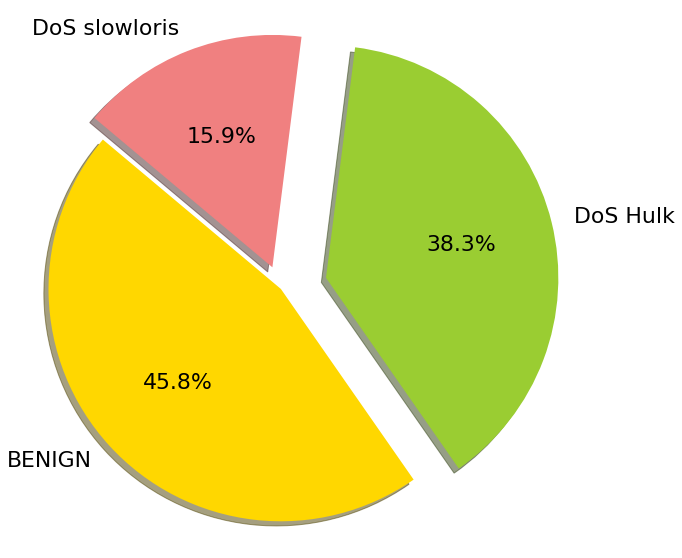

In [10]:
labels = 'BENIGN', 'DoS Hulk', 'DoS slowloris'
sizes = [len(df[df['Label']=='BENIGN']), len(df[df['Label']=='DoS Hulk']), 
         len(df[df['Label']=='DoS slowloris'])]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0, 0.2, 0.1)  # explode 1st slice

# Plot
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(10,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

This confirms what we found out from the data analysis that BENIGN and DoS Hulk have almost equal partition in the data while remaining being DoS slowloris.

Text(0, 0.5, 'Flow_Packets_Sec')

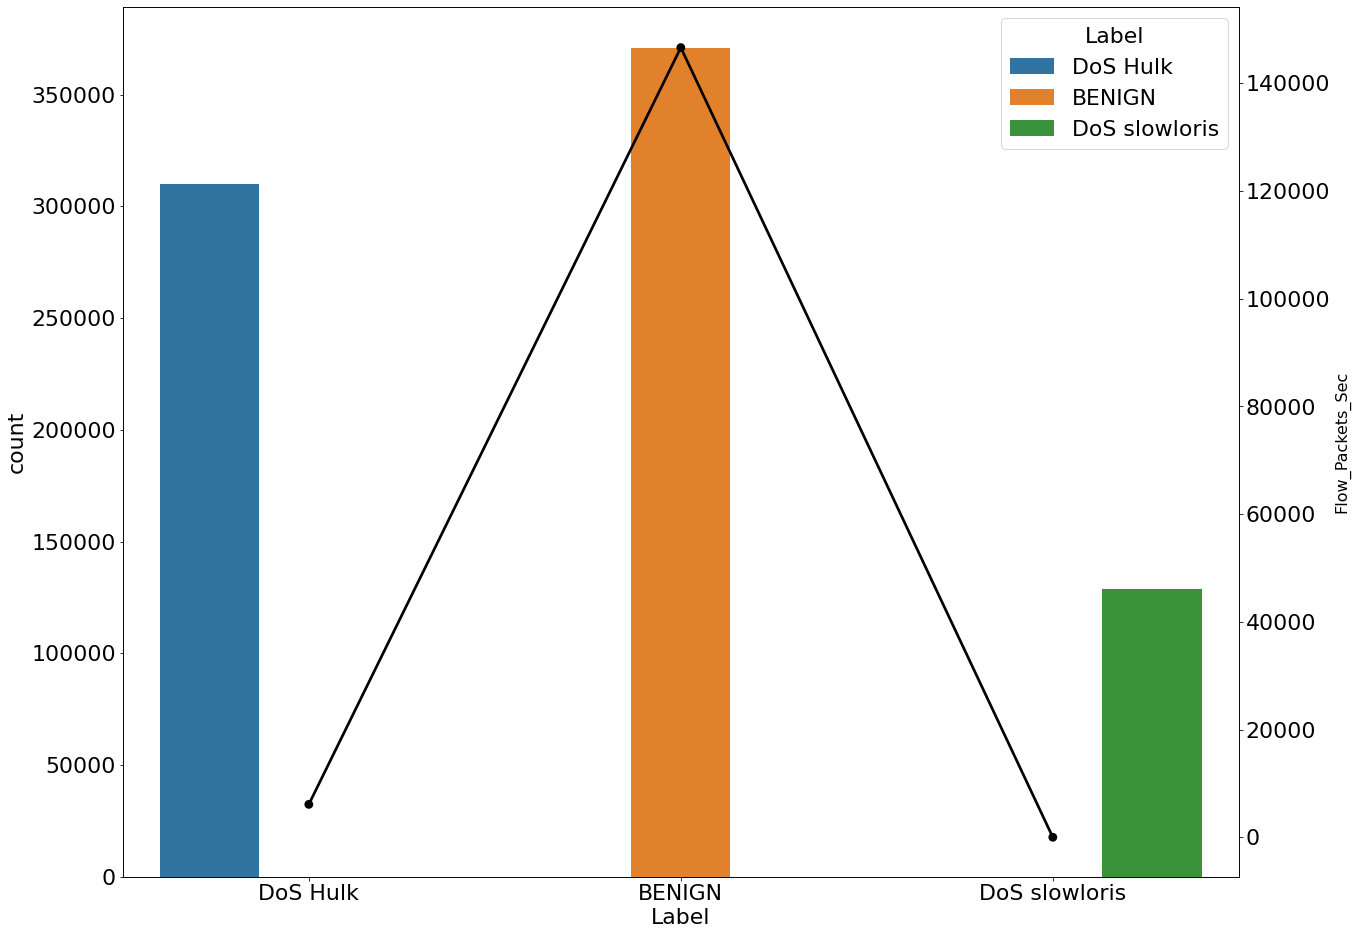

In [11]:

plt.figure(figsize=(20,16))
g1 = sns.countplot(x='Label', hue='Label', data=df)
gt = g1.twinx()
gt = sns.pointplot(y='Flow_Packets_Sec', x='Label', data=df, color='black', legend=False)
gt.set_ylabel("Flow_Packets_Sec", fontsize=16)

Text(0, 0.5, 'Flow_Packets_Sec')

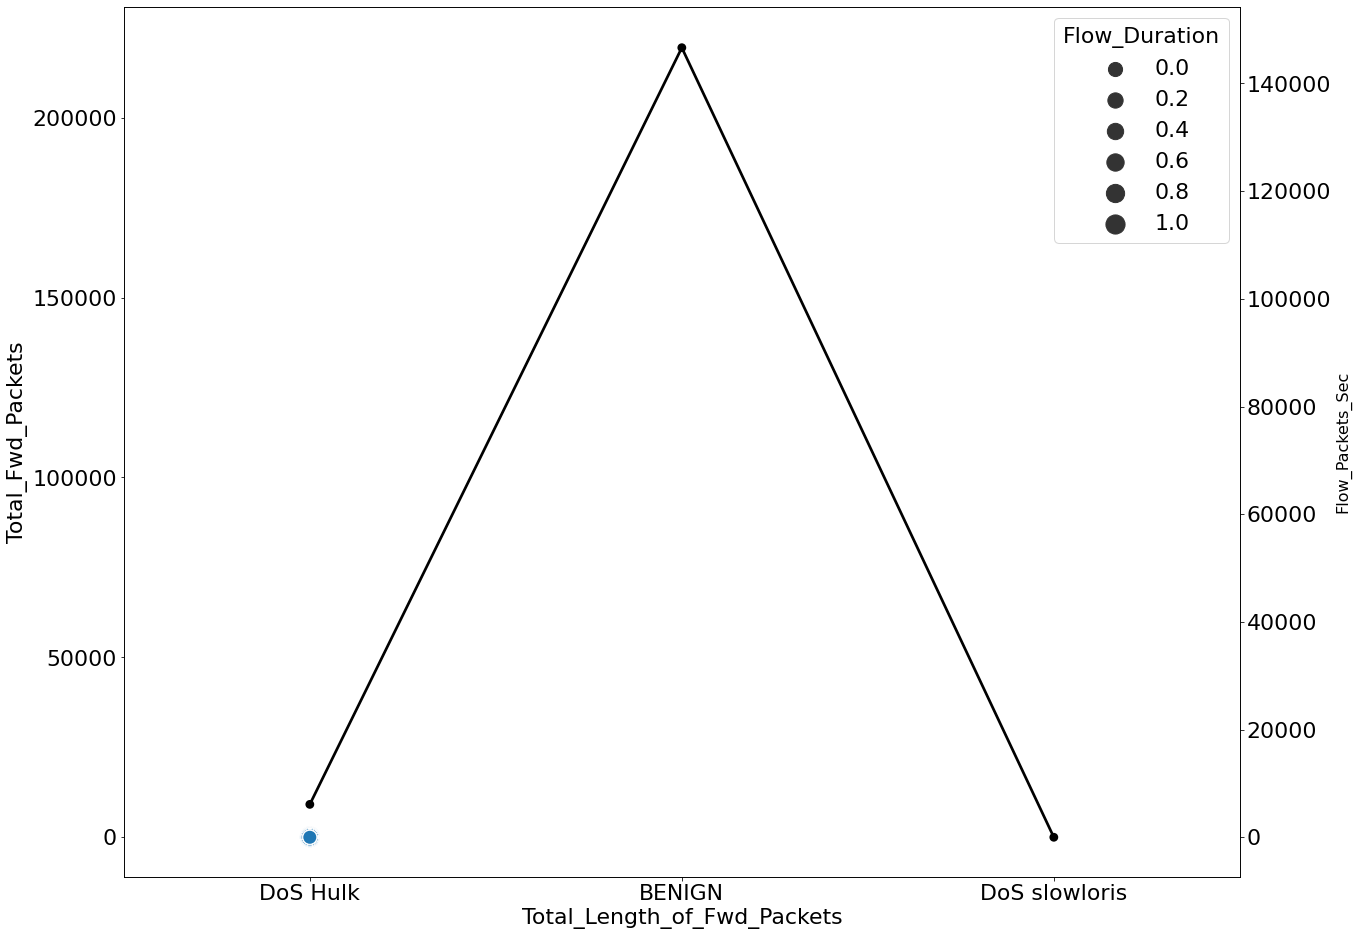

In [12]:
plt.figure(figsize=(20,16))
g1 = sns.scatterplot(y='Total_Fwd_Packets', x='Total_Length_of_Fwd_Packets',
                     sizes=(200, 400), size='Flow_Duration',data=df)

gt = g1.twinx()
t = sns.pointplot(y='Flow_Packets_Sec', x='Label', data=df, color='black', legend=False)
gt.set_ylabel("Flow_Packets_Sec", fontsize=16)

In the above plot, we notice that both total number of forward packets is less for both the DDoS attacks, while it's high for benign connections. 

Let's see if we get similar results for backward packets.

Text(0, 0.5, 'Flow_Packets_Sec')

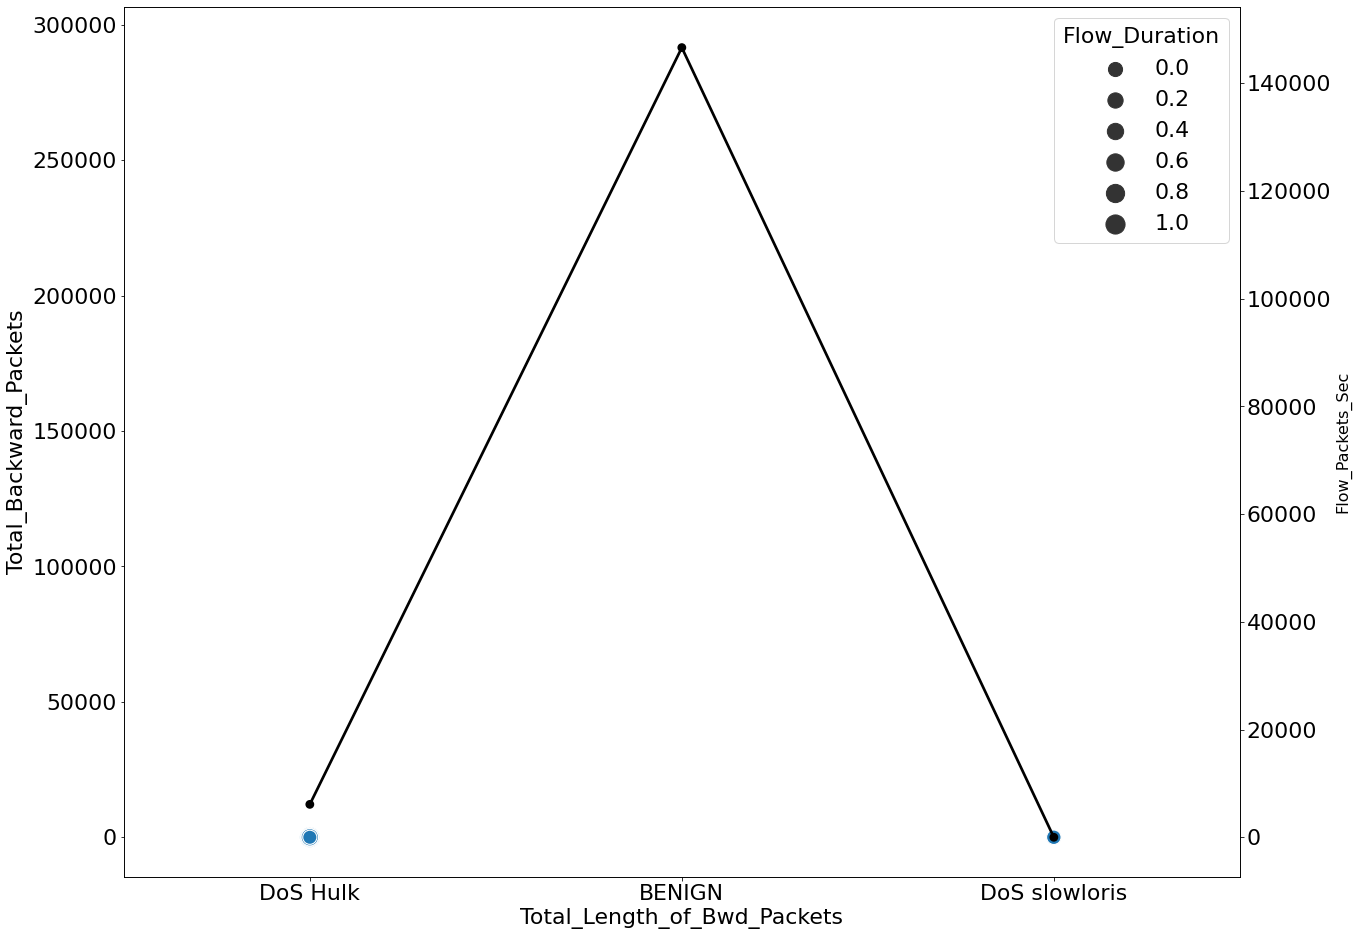

In [13]:
plt.figure(figsize=(20,16))
g1 = sns.scatterplot(y='Total_Backward_Packets', x='Total_Length_of_Bwd_Packets',
                     sizes=(200, 400), size='Flow_Duration',data=df)

gt = g1.twinx()
t = sns.pointplot(y='Flow_Packets_Sec', x='Label', data=df, color='black', legend=False)
gt.set_ylabel("Flow_Packets_Sec", fontsize=16)

# Modifying the data 

As Label column is the only one with categorical data in the form of string object, we encode it with 
* Benign = 0
* Dos Hulk = 1
* Dos slowloris = 2

In [15]:
cleanup_nums = {"Label":     {'BENIGN':0,
                              'DoS Hulk':1,  
                               'DoS slowloris':2}}
df= df.replace(cleanup_nums)
df.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Min,Bwd_Packet_Length_Mean,Bwd_Packet_Length_Std,Flow_Bytes_Sec,Flow_Packets_Sec,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Total,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Total,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Length,Bwd_Header_Length,Fwd_Packets_Sec,Bwd_Packets_Sec,Min_Packet_Length,Max_Packet_Length,Packet_Length_Mean,Packet_Length_Std,Packet_Length_Variance,FIN_Flag_Count,SYN_Flag_Count,RST_Flag_Count,PSH_Flag_Count,ACK_Flag_Count,URG_Flag_Count,CWE_Flag_Count,ECE_Flag_Count,Down_Up_Ratio,Average_Packet_Size,Avg_Fwd_Segment_Size,Avg_Bwd_Segment_Size,Fwd_Avg_Bytes_Bulk,Fwd_Avg_Packets_Bulk,Fwd_Avg_Bulk_Rate,Bwd_Avg_Bytes_Bulk,Bwd_Avg_Packets_Bulk,Bwd_Avg_Bulk_Rate,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,80,101168794,20,1,969,0,353,0,48.450000,119.083551,0,0,0.0000,0.000000,9.578052,0.207574,5.058440e+06,1.800000e+07,79000000.0,2.0,101000000.0,5.323696e+06,1.840000e+07,79000000.0,2.0,0.0,0.0000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,728.0,40.0,0.197689,0.009884,0.0,353.0,44.045455,114.164659,13033.569260,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.142857,48.450000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,20.0,969.0,1.0,0.0,-1.0,29200.0,3.0,0.0,739228.5,743103.4661,1264682.0,213775.0,49700000.0,41400000.0,79000000.0,20500000.0,1
1,60711,58,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,2.000000,176182.000000,5.800000e+01,0.000000e+00,58.0,58.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,32.0,32.0,17241.379310,17241.379310,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,60.0,33304.0,0.0,32.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0
2,53,31146,4,2,148,244,37,37,37.000000,0.000000,122,122,122.0000,0.000000,36909.000000,127126.000000,6.229200e+03,1.340626e+04,30200.0,1.0,30204.0,1.006800e+04,1.743482e+04,30200.0,1.0,1.0,1.0000,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,80.0,40.0,128.427406,64.213703,37.0,122.0,61.285714,41.475753,1720.238095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.500000,37.000000,122.0000,0.0,0.0,0.0,0.0,0.0,0.0,4.0,148.0,2.0,244.0,-1.0,-1.0,3.0,20.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0
3,80,254704,3,4,429,389,423,0,143.000000,242.505670,377,0,97.2500,186.521446,158570.000000,157963.000000,4.245067e+04,6.313298e+04,123916.0,4.0,130486.0,6.524300e+04,8.303272e+04,123956.0,6530.0,130788.0,43596.0000,7.520757e+04,130438.0,4.0,0.0,0.0,0.0,0.0,72.0,88.0,11.778378,15.704504,0.0,423.0,102.250000,184.206988,33932.214290,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,116.857143,143.000000,97.2500,0.0,0.0,0.0,0.0,0.0,0.0,3.0,429.0,4.0,389.0,8192.0,237.0,2.0,20.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0
4,443,11932077,12,16,5030,15703,1525,0,419.166667,644.896586,1793,0,981.4375,778.377798,79335.000000,133390.000000,4.419288e+05,2.120637e+06,11049290.0,2.0,882787.0,8.025336e+04,6.855032e+04,241684.0,182.0,11846006.0,789733.7333,2.839742e+06,11049530.0,50.0,0.0,0.0,0.0,0.0,252.0,332.0,1.005692,1.340923,0.0,1793.0,714.931035,764.389202,584290.852200,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,740.464286,419.166667,981.4375,0.0,0.0,0.0,0.0,0.0,0.0,12.0,5030.0,16.0,15703.0,8192.0,100.0,11.0,20.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0


In [16]:
cleanup_nums = {"Label":     {'BENIGN':0,
                              'DoS Hulk':1,  
                               'DoS slowloris':2}}
df2= df2.replace(cleanup_nums)
df2.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Min,Bwd_Packet_Length_Mean,Bwd_Packet_Length_Std,Flow_Bytes_Sec,Flow_Packets_Sec,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Total,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Total,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Length,Bwd_Header_Length,Fwd_Packets_Sec,Bwd_Packets_Sec,Min_Packet_Length,Max_Packet_Length,Packet_Length_Mean,Packet_Length_Std,Packet_Length_Variance,FIN_Flag_Count,SYN_Flag_Count,RST_Flag_Count,PSH_Flag_Count,ACK_Flag_Count,URG_Flag_Count,CWE_Flag_Count,ECE_Flag_Count,Down_Up_Ratio,Average_Packet_Size,Avg_Fwd_Segment_Size,Avg_Bwd_Segment_Size,Fwd_Avg_Bytes_Bulk,Fwd_Avg_Packets_Bulk,Fwd_Avg_Bulk_Rate,Bwd_Avg_Bytes_Bulk,Bwd_Avg_Packets_Bulk,Bwd_Avg_Bulk_Rate,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,53,87750,2,2,72,264,36,36,36.000000,0.000000,132,132,132.0,0.0,182064.000000,193413.000000,2.925000e+04,5.065816e+04,87745.0,2.0,2.0,2.000000e+00,0.000000e+00,2.0,2.0,3.0,3.000000,0.000000,3.0,3.0,0.0,0.0,0.0,0.0,64.0,64.0,22.792023,22.792023,36.0,132.0,74.400000,52.581366,2764.800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,93.000,36.000000,132.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,72.0,2.0,264.0,-1.0,-1.0,1.0,32.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0
1,53,31073,4,4,120,232,30,30,30.000000,0.000000,58,58,58.0,0.0,23032.000000,155666.000000,4.439000e+03,1.157438e+04,30687.0,3.0,30949.0,1.031633e+04,1.778528e+04,30853.0,48.0,338.0,112.666667,152.644467,287.0,3.0,0.0,0.0,0.0,0.0,128.0,104.0,128.729122,128.729122,30.0,58.0,42.444444,14.757296,217.777778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,47.750,30.000000,58.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,120.0,4.0,232.0,-1.0,-1.0,3.0,32.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0
2,80,41125329,8,1,387,0,188,0,48.375000,80.505435,0,0,0.0,0.0,9.410259,0.218843,5.140666e+06,1.297677e+07,37178044.0,4.0,41124170.0,5.874881e+06,1.383587e+07,37178044.0,4.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,256.0,40.0,0.194527,0.024316,0.0,188.0,38.700000,73.870833,5456.900000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.000,48.375000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,387.0,1.0,0.0,-1.0,29200.0,4.0,0.0,1218262.0,0.0,1218262.0,1218262.0,37178044.0,0.00,37178044.0,37178044.0,2
3,53,40633,4,4,140,508,35,35,35.000000,0.000000,127,127,127.0,0.0,70064.000000,127938.000000,5.804714e+03,1.151826e+04,30595.0,3.0,40438.0,1.347933e+04,2.330187e+04,40386.0,4.0,9990.0,3330.000000,5723.606119,9939.0,3.0,0.0,0.0,0.0,0.0,104.0,104.0,98.442153,98.442153,35.0,127.0,75.888889,48.488257,2351.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,85.375,35.000000,127.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,140.0,4.0,508.0,-1.0,-1.0,3.0,20.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0
4,80,41920705,7,1,211,0,168,0,30.142857,61.300975,0,0,0.0,0.0,5.033312,0.190836,5.988672e+06,9.464271e+06,21351194.0,4.0,41919422.0,6.986570e+06,9.956012e+06,21351194.0,4.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,224.0,40.0,0.166982,0.023855,0.0,168.0,23.444444,54.726847,2995.027778,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.375,30.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,211.0,1.0,0.0,-1.0,29200.0,4.0,0.0,2611.0,0.0,2611.0,2611.0,19711185.0,2319322.97,21351194.0,18071176.0,2


In [17]:
df2['Label'].dtype


dtype('int64')

## Separating the Label values from test and train datasets to form the input function

In [18]:

y_train = df['Label'] 
y_test = df2['Label']
x_train = df.drop('Label', axis = 1)
x_test = df2.drop('Label', axis = 1)

In [19]:
x_test.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Min,Bwd_Packet_Length_Mean,Bwd_Packet_Length_Std,Flow_Bytes_Sec,Flow_Packets_Sec,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Total,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Total,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Length,Bwd_Header_Length,Fwd_Packets_Sec,Bwd_Packets_Sec,Min_Packet_Length,Max_Packet_Length,Packet_Length_Mean,Packet_Length_Std,Packet_Length_Variance,FIN_Flag_Count,SYN_Flag_Count,RST_Flag_Count,PSH_Flag_Count,ACK_Flag_Count,URG_Flag_Count,CWE_Flag_Count,ECE_Flag_Count,Down_Up_Ratio,Average_Packet_Size,Avg_Fwd_Segment_Size,Avg_Bwd_Segment_Size,Fwd_Avg_Bytes_Bulk,Fwd_Avg_Packets_Bulk,Fwd_Avg_Bulk_Rate,Bwd_Avg_Bytes_Bulk,Bwd_Avg_Packets_Bulk,Bwd_Avg_Bulk_Rate,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
0,53,87750,2,2,72,264,36,36,36.000000,0.000000,132,132,132.0,0.0,182064.000000,193413.000000,2.925000e+04,5.065816e+04,87745.0,2.0,2.0,2.000000e+00,0.000000e+00,2.0,2.0,3.0,3.000000,0.000000,3.0,3.0,0.0,0.0,0.0,0.0,64.0,64.0,22.792023,22.792023,36.0,132.0,74.400000,52.581366,2764.800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,93.000,36.000000,132.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,72.0,2.0,264.0,-1.0,-1.0,1.0,32.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
1,53,31073,4,4,120,232,30,30,30.000000,0.000000,58,58,58.0,0.0,23032.000000,155666.000000,4.439000e+03,1.157438e+04,30687.0,3.0,30949.0,1.031633e+04,1.778528e+04,30853.0,48.0,338.0,112.666667,152.644467,287.0,3.0,0.0,0.0,0.0,0.0,128.0,104.0,128.729122,128.729122,30.0,58.0,42.444444,14.757296,217.777778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,47.750,30.000000,58.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,120.0,4.0,232.0,-1.0,-1.0,3.0,32.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2,80,41125329,8,1,387,0,188,0,48.375000,80.505435,0,0,0.0,0.0,9.410259,0.218843,5.140666e+06,1.297677e+07,37178044.0,4.0,41124170.0,5.874881e+06,1.383587e+07,37178044.0,4.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,256.0,40.0,0.194527,0.024316,0.0,188.0,38.700000,73.870833,5456.900000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.000,48.375000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,387.0,1.0,0.0,-1.0,29200.0,4.0,0.0,1218262.0,0.0,1218262.0,1218262.0,37178044.0,0.00,37178044.0,37178044.0
3,53,40633,4,4,140,508,35,35,35.000000,0.000000,127,127,127.0,0.0,70064.000000,127938.000000,5.804714e+03,1.151826e+04,30595.0,3.0,40438.0,1.347933e+04,2.330187e+04,40386.0,4.0,9990.0,3330.000000,5723.606119,9939.0,3.0,0.0,0.0,0.0,0.0,104.0,104.0,98.442153,98.442153,35.0,127.0,75.888889,48.488257,2351.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,85.375,35.000000,127.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,140.0,4.0,508.0,-1.0,-1.0,3.0,20.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
4,80,41920705,7,1,211,0,168,0,30.142857,61.300975,0,0,0.0,0.0,5.033312,0.190836,5.988672e+06,9.464271e+06,21351194.0,4.0,41919422.0,6.986570e+06,9.956012e+06,21351194.0,4.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,224.0,40.0,0.166982,0.023855,0.0,168.0,23.444444,54.726847,2995.027778,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.375,30.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,211.0,1.0,0.0,-1.0,29200.0,4.0,0.0,2611.0,0.0,2611.0,2611.0,19711185.0,2319322.97,21351194.0,18071176.0


In [20]:
x_test.shape

(346869, 77)

## Using Keras Model API to train 


As all our columns as of numerical in64 and float64, and the only categorical column is now separated our of train and test feature dataset, we define the feature columns functuions:

In [21]:
NUMERICAL_COLUMNS = ['Destination_Port', 'Flow_Duration', 'Total_Fwd_Packets',
       'Total_Backward_Packets', 'Total_Length_of_Fwd_Packets',
       'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max',
       'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
       'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_Bytes_Sec', 'Flow_Packets_Sec',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
       'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
       'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags',
       'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length',
       'Bwd_Header_Length', 'Fwd_Packets_Sec', 'Bwd_Packets_Sec',
       'Min_Packet_Length', 'Max_Packet_Length', 'Packet_Length_Mean',
       'Packet_Length_Std', 'Packet_Length_Variance', 'FIN_Flag_Count',
       'SYN_Flag_Count', 'RST_Flag_Count', 'PSH_Flag_Count', 'ACK_Flag_Count',
       'URG_Flag_Count', 'CWE_Flag_Count', 'ECE_Flag_Count', 'Down_Up_Ratio',
       'Average_Packet_Size', 'Avg_Fwd_Segment_Size', 'Avg_Bwd_Segment_Size',
       'Fwd_Avg_Bytes_Bulk', 'Fwd_Avg_Packets_Bulk', 'Fwd_Avg_Bulk_Rate',
       'Bwd_Avg_Bytes_Bulk', 'Bwd_Avg_Packets_Bulk', 'Bwd_Avg_Bulk_Rate',
       'Subflow_Fwd_Packets', 'Subflow_Fwd_Bytes', 'Subflow_Bwd_Packets',
       'Subflow_Bwd_Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Active_Mean', 'Active_Std', 'Active_Max', 'Active_Min', 'Idle_Mean',
       'Idle_Std', 'Idle_Max', 'Idle_Min']

We now convert the above dataframe to a Tensorflow dataset in order to train.

In [22]:
feature_columns= []
for feature_name in NUMERICAL_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype = float))

#print(feature_columns)

The following function is taken from the Tensorflow website in order to make computation easier. It converts the dataframe to a Tensorflow dataset for the Keras framework to work on it.

In [23]:
def make_input_fn(data_df, label_df, num_epochs=10000, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(x_train, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(x_test, y_test, num_epochs=1, shuffle=False)
eval_input_fn

<function __main__.make_input_fn.<locals>.input_function>

We define a model which takes in an input of 77 features and has 3 layers of sizes 128, 64 and 8 respectively with one output layer which denotes the type of attack. 

In [24]:
def create_model():
    Input_ = keras.Input(shape=(77,))
    model = keras.layers.Dense(128, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(l=0.1))(Input_)
    model = keras.layers.Dropout(0.4)(model)

    model = keras.layers.Dense(64, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(l=0.1))(model)
    model = keras.layers.Dropout(0.4)(model)

    model = keras.layers.Dense(8, activation=tf.nn.sigmoid, kernel_regularizer=keras.regularizers.l2(l=0.1))(model)
    model = keras.layers.Dropout(0.4)(model)

    model = keras.layers.Dense(1, activation=tf.nn.sigmoid)(model)
    return keras.Model(inputs=Input_, outputs=model)

In [25]:
model = create_model()
model.compile(optimizer=tf.keras.optimizers.RMSprop(),
                  loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mae', 'acc'])

In [26]:

history = model.fit( x = x_train, y= y_train, epochs= 40, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/40
25293/25293 [==============================] - 50s 2ms/step - loss: 0.5384 - mae: 0.3197 - acc: 0.7246 - val_loss: 0.2836 - val_mae: 0.2798 - val_acc: 0.7237
Epoch 2/40
25293/25293 [==============================] - 50s 2ms/step - loss: 0.2924 - mae: 0.2882 - acc: 0.7417 - val_loss: 0.2250 - val_mae: 0.2231 - val_acc: 0.7863
Epoch 3/40
25293/25293 [==============================] - 49s 2ms/step - loss: 0.2976 - mae: 0.2906 - acc: 0.7401 - val_loss: 0.2205 - val_mae: 0.2319 - val_acc: 0.7830
Epoch 4/40
25293/25293 [==============================] - 49s 2ms/step - loss: 0.2936 - mae: 0.2861 - acc: 0.7401 - val_loss: 0.2070 - val_mae: 0.2039 - val_acc: 0.8001
Epoch 5/40
25293/25293 [==============================] - 49s 2ms/step - loss: 0.2936 - mae: 0.2861 - acc: 0.7394 - val_loss: 0.9439 - val_mae: 0.6430 - val_acc: 0.5073
Epoch 6/40
25293/25293 [==============================] - 49s 2ms/step - loss: 0.2947 - mae: 0.2868 - acc: 0.7404 - val_loss: 0.2784 - val_mae: 0.2724 - va

We notice we do not get a good accuracy value from the above model and it kind of bottlenecks around 74%.

## Using a Deep Neural Network classifier

Here we use the Tensorflow framework to define a model of hidden units 128, 64 and 8 units respectively with a dropout of 0.4 in order to prevent overfitting. Sigmoid activation unit is used and an RMSprop optimizer is used as well. 














In [27]:
classifier = tf.estimator.DNNClassifier(
    feature_columns=feature_columns,
    hidden_units=[128, 64, 8], dropout=0.4,
    activation_fn= tf.nn.sigmoid,
    optimizer=tf.keras.optimizers.RMSprop,
    n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpr329cdum', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


The classifier is trained over 250,000 steps

In [28]:
classifier.train( input_fn=train_input_fn, steps=250000 )


Streaming output truncated to the last 5000 lines.
INFO:tensorflow:global_step/sec: 348.984
INFO:tensorflow:loss = 0.7045002, step = 400 (0.288 sec)
INFO:tensorflow:global_step/sec: 352.893
INFO:tensorflow:loss = 0.74481153, step = 500 (0.282 sec)
INFO:tensorflow:global_step/sec: 337.933
INFO:tensorflow:loss = 0.6232795, step = 600 (0.299 sec)
INFO:tensorflow:global_step/sec: 349.296
INFO:tensorflow:loss = 0.6066318, step = 700 (0.286 sec)
INFO:tensorflow:global_step/sec: 340.029
INFO:tensorflow:loss = 0.49491936, step = 800 (0.291 sec)
INFO:tensorflow:global_step/sec: 322.41
INFO:tensorflow:loss = 0.70410097, step = 900 (0.310 sec)
INFO:tensorflow:global_step/sec: 338.924
INFO:tensorflow:loss = 0.51082754, step = 1000 (0.295 sec)
INFO:tensorflow:global_step/sec: 342.729
INFO:tensorflow:loss = 0.63223153, step = 1100 (0.292 sec)
INFO:tensorflow:global_step/sec: 352.007
INFO:tensorflow:loss = 0.5222587, step = 1200 (0.284 sec)
INFO:tensorflow:global_step/sec: 341.128
INFO:tensorflow:los

The above model obtains an accuracy of 93.3% which is a huge improvement over our previous model.

In [29]:
eval_result = classifier.evaluate(
    input_fn= eval_input_fn)

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-01-18T16:00:56Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpr329cdum/model.ckpt-250000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 21.68198s
INFO:tensorflow:Finished evaluation at 2021-01-18-16:01:18
INFO:tensorflow:Saving dict for global step 250000: accuracy = 0.93191665, average_loss = 0.24545074, global_step = 250000, loss = 0.24545342
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 250000: /tmp/tmpr329cdum/model.ckpt-250000

Test set accuracy: 0.932



In [30]:
eval_result

{'accuracy': 0.93191665,
 'average_loss': 0.24545074,
 'global_step': 250000,
 'loss': 0.24545342}

### Now we apply a Gaussian Baye's Classifier and a Decision Tree to the training data and evaluate it on the test set. 

In [31]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics

In [32]:
gaussCl = GaussianNB()
gaussCl.fit(x_train,y_train)
gaussCl_pred = gaussCl.predict(x_test)
print("Accuracy : ",metrics.accuracy_score(y_test,gaussCl_pred))

Accuracy :  0.9481879326200958


In [33]:
DTcl = DecisionTreeClassifier()
DTcl = DTcl.fit(x_train,y_train)
DTcl_pred = DTcl.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, DTcl_pred))

Accuracy: 0.9999452242777532
